### Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Invistico_Airline.csv")
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
satisfaction,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
Gender,Female,Male,Female,Female,Female,Male,Female,Male,Female,Male
Customer Type,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,65,47,15,60,70,30,66,10,56,22
Type of Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel
Class,Eco,Business,Eco,Eco,Eco,Eco,Eco,Eco,Business,Eco
Flight Distance,265,2464,2138,623,354,1894,227,1812,73,1556
Seat comfort,0,0,0,0,0,0,0,0,0,0
Departure/Arrival time convenient,0,0,0,0,0,0,0,0,0,0
Food and drink,0,0,0,0,0,0,0,0,0,0


## EDA

In [3]:
data.shape

(129880, 23)

In [4]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [5]:
data.isnull().sum()[data.isnull().sum() > 0]

Arrival Delay in Minutes    393
dtype: int64

In [6]:
#replace null values with 0.0
data['Arrival Delay in Minutes'].fillna(0.0, inplace = True)

In [7]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

## Encoding

In [8]:
import seaborn as sns 

<Axes: >

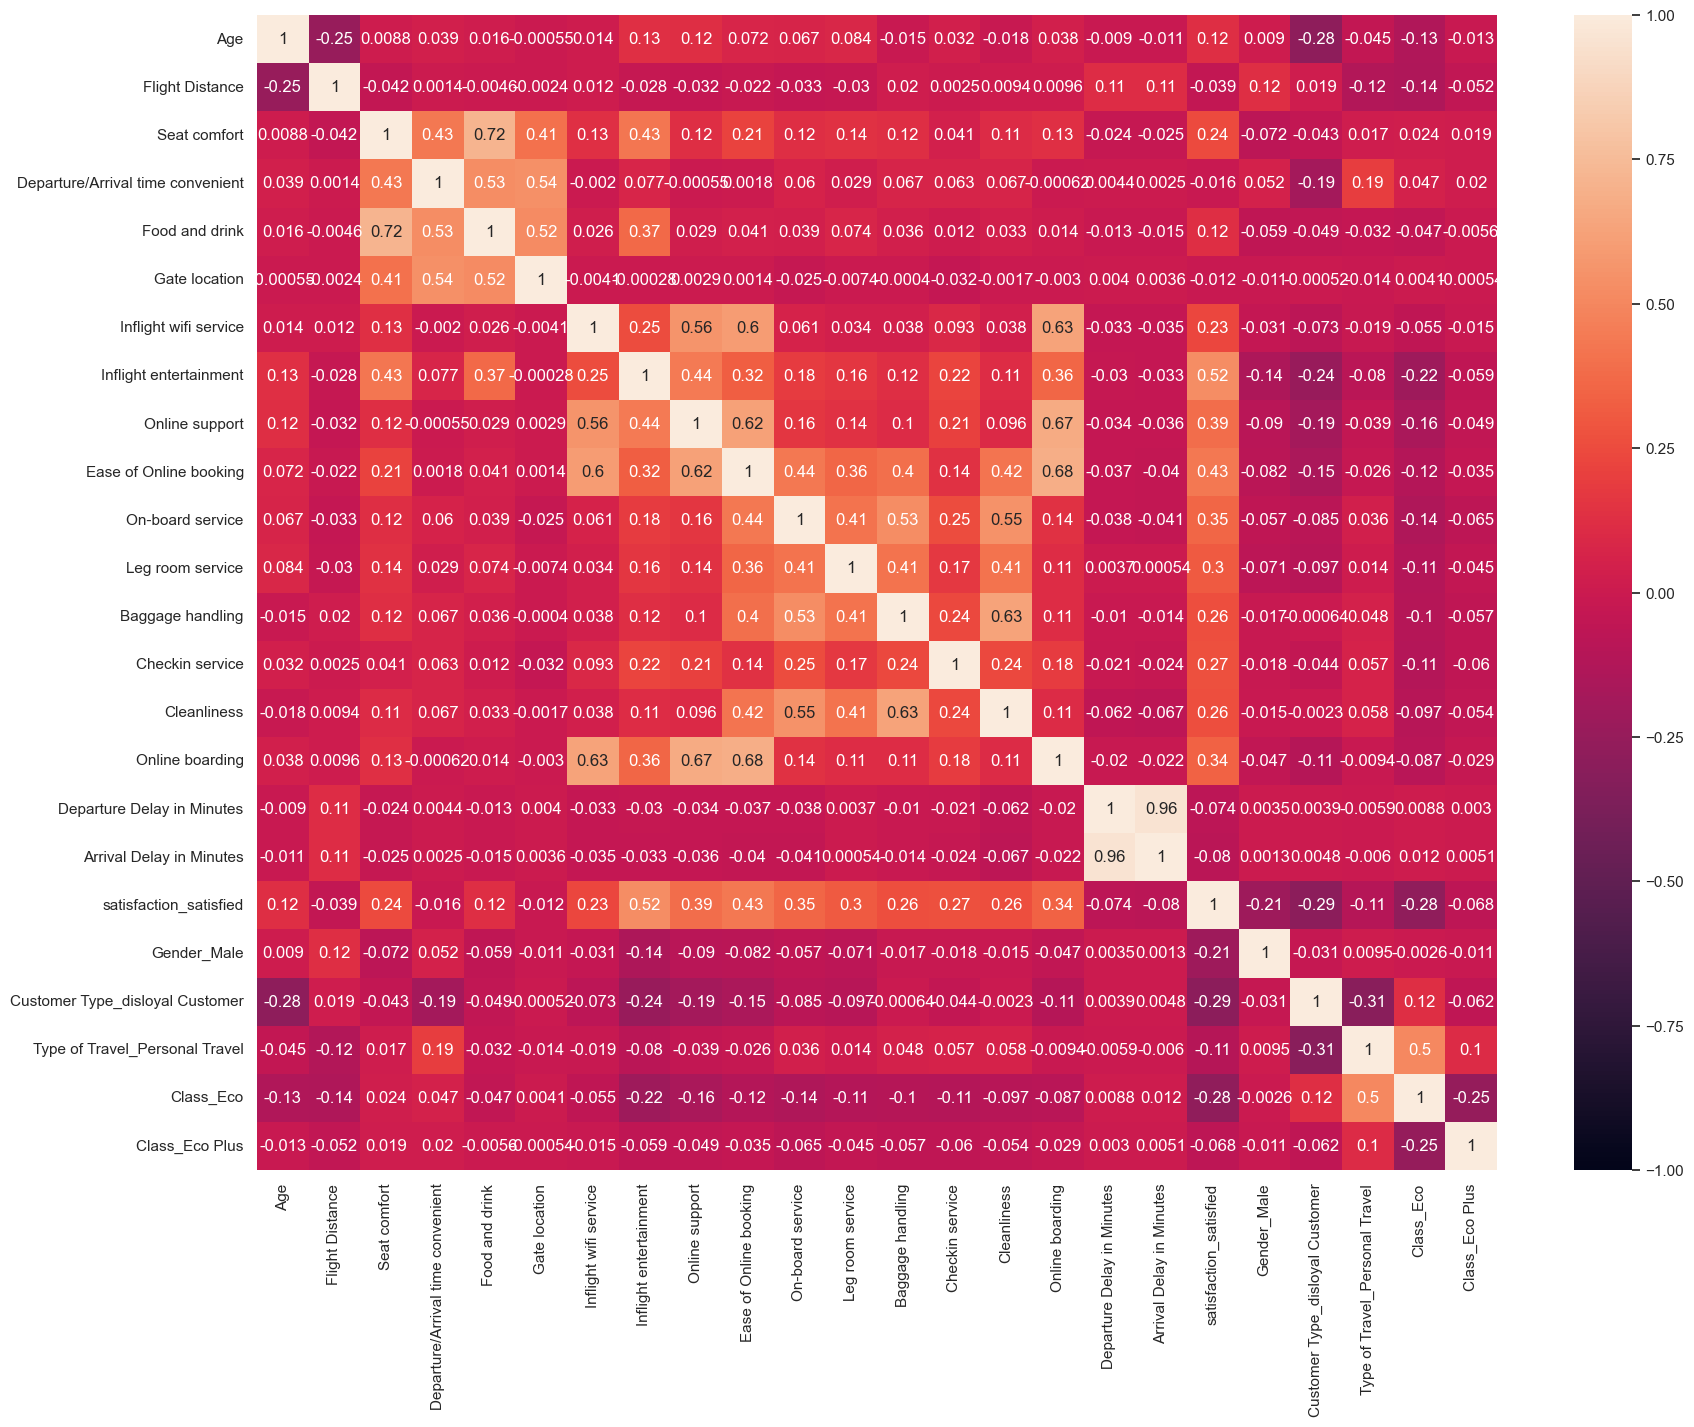

In [9]:
#examine correlations
sns.set(rc={"figure.figsize":(20,15)})
sns.heatmap(pd.get_dummies(data,drop_first=True).corr(),annot=True,vmin=-1)

In [10]:
data.drop(columns = "Arrival Delay in Minutes", inplace = True)

In [11]:
#encode categorical data
data = pd.get_dummies(data, drop_first = True)

In [12]:
data.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,satisfaction_satisfied,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,5,3,2,0,True,False,False,True,True,False
1,47,2464,0,0,0,3,0,2,2,3,...,2,3,2,310,True,True,False,True,False,False
2,15,2138,0,0,0,3,2,0,2,2,...,4,4,2,0,True,False,False,True,True,False
3,60,623,0,0,0,3,3,4,3,1,...,4,1,3,0,True,False,False,True,True,False
4,70,354,0,0,0,3,4,3,4,2,...,4,2,5,0,True,False,False,True,True,False


## Deep Learning

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
#split the dataset by 90% and 10%
x,x_test,y,y_test=train_test_split(data.drop(columns="satisfaction_satisfied"),
                                   data.satisfaction_satisfied,
                                   random_state=42,
                                   test_size=.1)

In [15]:
print(f"x shape is {x.shape} \n y shape is {y.shape}")
print(f"xtest shape is {x_test.shape} \n ytest shape is {y_test.shape}")

x shape is (116892, 22) 
 y shape is (116892,)
xtest shape is (12988, 22) 
 ytest shape is (12988,)


In [16]:
model = Sequential()

In [17]:
#3 hidden layers
model.add(layers.Dense(units=22,
                       activation="relu"))
model.add(layers.Dense(units=60,
                       activation="relu"))
model.add(layers.Dense(units=32,
                       activation="relu"))
#binary classification output layer
model.add(layers.Dense(units=1,
                       activation="sigmoid"))

In [18]:
from tensorflow.keras.losses import binary_crossentropy

In [19]:
#compile model
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [20]:
x = x.astype('float32')
y = y.astype('float32')
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

In [21]:
#train model
model.fit(x , y, batch_size = 50, epochs = 50) 

Epoch 1/50


2338/2338 [==============================] - 4s 1ms/step - loss: 1.3283 - accuracy: 0.6765
Epoch 2/50
2338/2338 [==============================] - 2s 1ms/step - loss: 0.5687 - accuracy: 0.7623
Epoch 3/50
2338/2338 [==============================] - 2s 1ms/step - loss: 0.5113 - accuracy: 0.7827
Epoch 4/50
2338/2338 [==============================] - 3s 1ms/step - loss: 0.4776 - accuracy: 0.7947
Epoch 5/50
2338/2338 [==============================] - 3s 1ms/step - loss: 0.4484 - accuracy: 0.8040
Epoch 6/50
2338/2338 [==============================] - 2s 1ms/step - loss: 0.4273 - accuracy: 0.8129
Epoch 7/50
2338/2338 [==============================] - 2s 1ms/step - loss: 0.4087 - accuracy: 0.8216
Epoch 8/50
2338/2338 [==============================] - 2s 1ms/step - loss: 0.3952 - accuracy: 0.8295
Epoch 9/50
2338/2338 [==============================] - 3s 1ms/step - loss: 0.3876 - accuracy: 0.8321
Epoch 10/50
2338/2338 [==============================] - 3s 1ms/step - loss: 0.3

In [22]:
model.evaluate(x_test,y_test)

406/406 [==============================] - 1s 899us/step - loss: 0.1904 - accuracy: 0.9181


[0.19041718542575836, 0.9180782437324524]

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
y_hat=model.predict(x_test)
y_hat=y_hat.round()

406/406 [==============================] - 0s 778us/step


In [25]:
print(f"Your model accuracy is \n{confusion_matrix(y_test,y_hat)}")

Your model accuracy is 
[[5355  510]
 [ 554 6569]]


In [26]:
print(f"Your model accuracy is \n{classification_report(y_test,y_hat)}")

Your model accuracy is 
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      5865
         1.0       0.93      0.92      0.93      7123

    accuracy                           0.92     12988
   macro avg       0.92      0.92      0.92     12988
weighted avg       0.92      0.92      0.92     12988

